<img src="Branded_Logo_CUDenver.PNG" width="150">

## <center>CSCI 4580/5580 - Data Science – Spring 2025</center>
<center>Lab 5: Tabular Data Processing with Pandas</center><center><font color='red'>Deadline: March 14, 2025 - 11:59 PM</font></center><center>Total Points: 100</center>

## Instructions
- Please note that this lab must be done individually. By submitting this lab, you certify that this is your own work, your code will be checked against other submissions and resources using automatic tools. Everyone should be getting a hands on experience in this course. You are free to discuss course material with fellow students, and we encourage you to use Internet resources to aid your understanding, but the work you turn in, including all code and answers, must be your own work.

## Deliverables
You need to submit a single .ipynb file on Canvas, named your-lastname_your-first-name.ipynb. For example, if your name is John Smith, you should name the file smith_john.ipynb.
- Please do not include extra files such as the input datasets in your submission.
- Answer Questions 1 - 11 in the designated cells. Please do not add or remove any cells. 
- Please download your submission file after submission and make sure it is not corrupted. Use the 'Run All' option from the 'Cell' menu to ensure all cells run without any issues. We will not be responsible for corrupted submissions and will not take a resubmission after the deadline.

## Need Help?
If you need help with this lab, please email me at sundous.hussein@ucdenver.edu or come to my office hours. We also encourage you to ask your questions on the designated channel for the lab on Microsoft Teams. This way, you may receive assistance from your classmates that might’ve ran through the same issues.

****

In this lab, we will look at how to work with data stored in a tabular form and perform exploratory data analysis on it. We will be using the Python Data Analysis Library (aka Pandas) to do this.

## Introducting Pandas

The two main data structures that Pandas support are Series and DataFrames. Series are one-dimensional data structures that are a collection of any numpy data type. DataFrames on the other hand are two dimensional data structures which resemble a database table or say an Excel spreadsheet. In this lab we will primarily be using DataFrames and will look at operations that we can perform using them.

Before you start, download the following datasets from Canvas:
>wc_day6_1_samples.csv <br/>
>restaurants.csv

In [1]:
from pylab import *
%matplotlib inline
import pandas as pd
df = pd.DataFrame( { 'a' : [1, 2, 3, 4], 'b': [ 'w', 'x', 'y', 'z'] })

If you need clarifications about the Pandas API you can type the function name followed by ? to get inline help. For example to get help with the above call run:

In [2]:
pd.DataFrame?

If you want to see the same in a browser lookup the function in the <a href="http://pandas.pydata.org/pandas-docs/stable/api.html">API documentation</a>

## DataFrame Basics

The simplest way to see what is in a DataFrame is to just print it to the console. For example to see the DataFrame we created before you can just type df and see something like

In [3]:
df

,a,b
0,1,w
1,2,x
2,3,y
3,4,z


This shows that we have two columnns 'a' and 'b' and four rows in our DataFrame.

However large DataFrames cannot be printed to the console and we have higher level commands to inspect its contents. To get information on the schema of the DataFrames, we can use the info function

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   a       4 non-null      int64 
 1   b       4 non-null      object
dtypes: int64(1), object(1)
memory usage: 192.0+ bytes


To see the first few rows you can use <code>head</code> and to see the last few rows you can use <code>tail</code>. This is similar to the UNIX-command line tools (Remember Lab 1 !?)

In [5]:
df.head(2)

,a,b
0,1,w
1,2,x


To print any range of rows from the DataFrame you can use array-like indexing of row ids. As you might have noticed rows are numbered from 0 in Pandas, so to get the middle two rows we can use the range 1:3

In [6]:
df[1:3]

,a,b
1,2,x
2,3,y


Finally, Pandas also has a useful function describe that summarizes the contents of numerical columns in a DataFrame. For example in `df` we can see the mean, standard deviation etc. for the column `a` by running describe.

Having worked our way through the basics, let's now see how we can use Pandas for data analysis. To do this part of the lab we will reuse the World Cup soccer logs. However this time the input data has been sampled and formatted as a csv file that you will load first:

In [7]:
log_df = pd.read_csv("wc_day6_1_sample.csv",
                     names=['ClientID', 'Date', 'Time', 'URL', 'ResponseCode', 'Size'],
                     na_values=['-'], encoding="cp1250")

The names argument tells Pandas what the column names are in our file and na_values indicates what character is used for missing values in our dataset. Use the commands from the previous section to explore the dataset and its summary statistics.

> Question 1) How many rows are present in log_df?

In [8]:
# Add your answer to Question 1 here
display(log_df)

,ClientID,Date,Time,URL,ResponseCode,Size
0,1044,30/Apr/1998,22:46:12,/images/11104.gif,200.0,508.0
1,10871,01/May/1998,12:10:53,/images/ligne.gif,200.0,169.0
2,11012,01/May/1998,12:17:30,/english/individuals/player111503.htm,200.0,7027.0
3,11435,01/May/1998,13:15:13,/french/frntpage.htm,304.0,0.0
4,12128,01/May/1998,13:30:21,/english/images/nav_sitemap_off.gif,304.0,NaN
...,...,...,...,...,...,...
199995,14308,01/May/1998,15:31:30,/english/images/news_btn_press_off.gif,200.0,1740.0
199996,14401,01/May/1998,15:54:00,/images/102338.gif,200.0,1573.0
199997,8145,01/May/1998,08:41:37,/english/news/player01.htm,200.0,42591.0
199998,17799,01/May/1998,18:34:08,/english/images/nav_team_off.gif,200.0,776.0


> Question 2) What are the URLs between rows 85 and 87 inclusive ?

In [9]:
# Add your answer to Question 2 here
log_df[85:88].URL

85     /english/nav_top_inet.html
86        /images/teams_hm_bg.jpg
87    /images/home_eng_phrase.gif
Name: URL, dtype: object

## SQL-like operators

Next we will look at operators in Pandas that allow us to perform SQL-like queries on the dataset.

### Selection

A SQL statement typically selects a subset of rows from a table that match a given criteria. This is known as the <a href="https://en.wikipedia.org/wiki/Relational_algebra">Selection</a> operator in Relational Algebra. Similarly we can perform selections in Pandas using boolean indexing.

Boolean indexing refers to a technique where you can use a list of boolean values to filter a DataFrame. For example let's say we only want entries from '01/May/1998'. To do this we can create a boolean list like

In [10]:
is_may1st = log_df['Date'] == '01/May/1998'
is_may1st.head(2)

0    False
1     True
Name: Date, dtype: bool

Now we can filter our DataFrame by passing it the boolean list.

In [11]:
may1_df = log_df[is_may1st]
may1_df.head()

,ClientID,Date,Time,URL,ResponseCode,Size
1,10871,01/May/1998,12:10:53,/images/ligne.gif,200.0,169.0
2,11012,01/May/1998,12:17:30,/english/individuals/player111503.htm,200.0,7027.0
3,11435,01/May/1998,13:15:13,/french/frntpage.htm,304.0,0.0
4,12128,01/May/1998,13:30:21,/english/images/nav_sitemap_off.gif,304.0,NaN
5,13649,01/May/1998,14:55:01,/images/hm_anime_e.gif,200.0,15609.0


Or we can directly do this by passing in the boolean clause to the DataFrame

In [12]:
may1_df = log_df[log_df['Date'] == '01/May/1998']
may1_df.head()

,ClientID,Date,Time,URL,ResponseCode,Size
1,10871,01/May/1998,12:10:53,/images/ligne.gif,200.0,169.0
2,11012,01/May/1998,12:17:30,/english/individuals/player111503.htm,200.0,7027.0
3,11435,01/May/1998,13:15:13,/french/frntpage.htm,304.0,0.0
4,12128,01/May/1998,13:30:21,/english/images/nav_sitemap_off.gif,304.0,NaN
5,13649,01/May/1998,14:55:01,/images/hm_anime_e.gif,200.0,15609.0


## Projection

While selection is used for filtering rows, <a href="https://en.wikipedia.org/wiki/Relational_algebra">Projection</a> is the relational algebra operator used to select columns. To do this with Pandas we just need to pass in a list of columns that we wish to select. For example to only keep the 'URL' and 'ResponseCode' column we would run

In [13]:
url_codes = log_df[['URL', 'ResponseCode']]
url_codes.head(5)

,URL,ResponseCode
0,/images/11104.gif,200.0
1,/images/ligne.gif,200.0
2,/english/individuals/player111503.htm,200.0
3,/french/frntpage.htm,304.0
4,/english/images/nav_sitemap_off.gif,304.0


## Grouping

Pandas also allows you to group the DataFrame by values in any column. For example to group requests by 'ResponseCode' you can run

In [14]:
grouped = log_df.groupby('ResponseCode')
grouped

As you can see from the output above, grouped is not a DataFrame but an object of type DataFrameGroupBy. This just means that it contains a number of groups and each group is in turn a DataFrame. To see this try

In [15]:
grouped.ngroups
grouped.groups.keys()

dict_keys([200.0, 206.0, 302.0, 304.0, 400.0, 404.0, 500.0])

In [16]:
grouped.get_group(304).head()

,ClientID,Date,Time,URL,ResponseCode,Size
3,11435,01/May/1998,13:15:13,/french/frntpage.htm,304.0,0.0
4,12128,01/May/1998,13:30:21,/english/images/nav_sitemap_off.gif,304.0,NaN
15,20505,01/May/1998,21:36:22,/english/images/nav_store_off.gif,304.0,0.0
19,4518,01/May/1998,03:12:52,/english/images/nav_field_off.gif,304.0,0.0
23,6904,01/May/1998,13:09:01,/english/history/body.html,304.0,NaN


You can also group by multiple columns by just passing the a list of column names. For example to group by both date and response code you can run:

In [17]:
multi_grouped = log_df.groupby(['ResponseCode', 'Date'])

Pandas also has useful commands to print various statistics about elements in each group (see <a href="https://pandas.pydata.org/pandas-docs/stable/reference/groupby.html">here</a>)

1. `grouped.describe()` prints summary statistics for numeric columns in each group
2. `grouped.size()` prints the number of elements in each group
3. Similarly `grouped.sum()`, `grouped.mean()` and `grouped.median()` print the sum, mean and median values for numeric columns in each group


> Question 3) Find all URLs with Response Code 200?

In [18]:
# Add your answer to Question 3 here

log_df[log_df['ResponseCode'] == 200]['URL']

0                                 /images/11104.gif
1                                 /images/ligne.gif
2             /english/individuals/player111503.htm
5                            /images/hm_anime_e.gif
6             /english/images/comp_bu_group_off.gif
                            ...                    
199995       /english/images/news_btn_press_off.gif
199996                           /images/102338.gif
199997                   /english/news/player01.htm
199998             /english/images/nav_team_off.gif
199999    /french/playing/images/trivia/02comme.gif
Name: URL, Length: 173924, dtype: object

> Question 4) Find all URLs with ClientID between 1880 and 2851?

In [19]:
# Add your answer to Question 4 here

log_df[(log_df['ClientID'] >= 1880) & (log_df['ClientID'] <= 2851)]['URL']

57                            /images/s102383.gif
104                         /images/home_tool.gif
105                   /images/comp_hm_archive.gif
106                           /images/s102325.gif
164          /french/images/news_btn_kits_off.gif
                           ...                   
199900                     /images/bg_team_hm.jpg
199908              /english/images/fpnewstop.gif
199950                  /images/home_bg_stars.gif
199951                     /images/nav_bg_top.gif
199952    /english/images/team_group_header_f.gif
Name: URL, Length: 9597, dtype: object

## Plotting data in a DataFrame

To plot a Series or a DataFrame you can just call `plot()` on the object and for a histogram just call `hist()`

<AxesSubplot:>

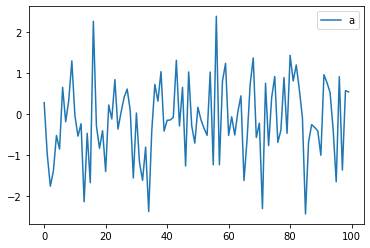

In [20]:
rand_df = pd.DataFrame({'a' : randn(100)})
rand_df.plot()

array([[<AxesSubplot:title={'center':'a'}>]], dtype=object)

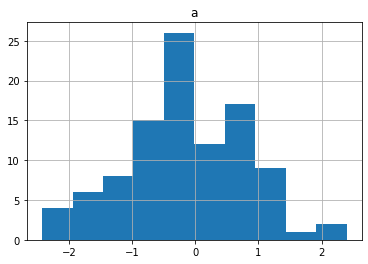

In [21]:
rand_df.hist()

> Question 5) Create a DataFrame for the unique dates in the dataset and the number of requests made on each date. Your DataFrame should consist of two columns (Date and NumofRequests). Below is a sample showing how your DataFrame should look like (the numbers don't reflect actual values from the dataset). 

| Date        | NumOfRequests | 
| :---        |    :----:     |          
| 01/May/1998 | 500           | 
| .           |               |
| .           |               |

In [22]:
# Add your answer to Question 5 here

unique_dates_requests = log_df.groupby('Date').size().reset_index(name='NumOfRequests')

unique_dates_requests

,Date,NumOfRequests
0,01/May/1998,183303
1,30/Apr/1998,16697


> Question 6) Create a Bar Char for the DataFrame your created in Question 5. Make sure your chart has a tite and axis labels. 

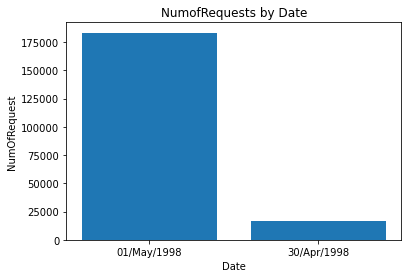

In [23]:
# Add your answer to Question 6 here
import matplotlib.pyplot as plt

plt.bar(unique_dates_requests['Date'], unique_dates_requests['NumOfRequests'])
plt.xlabel('Date')
plt.ylabel('NumOfRequest')
plt.title('NumofRequests by Date')
plt.show()

# Joins in Pandas

## Joins

A **join** is a way to connect rows in two different data tables based on some criteria.
Suppose the university has a database for student records with two tables in it: *Students* and *Grades*.


In [24]:
import pandas as pd

Students = pd.DataFrame({'student_id': [1, 2], 'name': ['Alice', 'Bob']})
Students

,student_id,name
0,1,Alice
1,2,Bob


In [25]:
Grades = pd.DataFrame({'student_id': [1, 1, 2, 2], 'class_id': [1, 2, 1, 3], 'grade': ['A', 'C', 'B', 'B']})
Grades

,student_id,class_id,grade
0,1,1,A
1,1,2,C
2,2,1,B
3,2,3,B


Let's say we want to know all of Bob's grades.
Then, we can look up Bob's student ID in the Students table, and with the ID, look up his grades in the Grades table.
Joins naturally express this process: when two tables share a common type of column (**student ID** in this case), we can join the tables together to get a complete view.

In Pandas, we can use the `merge` method to perform a join.
Pass the two tables to join as the first arguments, then the "on" parameter is set to the join column name.

In [26]:
Student_Grades = pd.merge(Students, Grades, on='student_id')
Student_Grades

,student_id,name,class_id,grade
0,1,Alice,1,A
1,1,Alice,2,C
2,2,Bob,1,B
3,2,Bob,3,B


> Question 7) Use **merge** to join Student_Grades with the Classes table below, and find out what class Alice got an A in?

In [27]:
Classes = pd.DataFrame({'class_id': [1, 2, 3], 'title': ['Math', 'English', 'Spanish']})

In [28]:
# Add you answer to Question 7 here
Student_Grades_Classes = pd.merge(Student_Grades, Classes, on='class_id')

Student_Grades_Classes[(Student_Grades_Classes['name'] == 'Alice') & 
                       (Student_Grades_Classes['grade'] == 'A')]#['title']

,student_id,name,class_id,grade,title
0,1,Alice,1,A,Math


# Joining the Restaurant Data

Now let's load the restaurant data that we will be analyzing:

In [29]:
resto = pd.read_csv('restaurants.csv')
resto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       858 non-null    int64 
 1   cluster  858 non-null    int64 
 2   name     858 non-null    object
 3   city     858 non-null    object
dtypes: int64(2), object(2)
memory usage: 26.9+ KB


In [30]:
resto[:10]

,id,cluster,name,city
0,560,453,2223,san francisco
1,781,675,103 west,atlanta
2,279,172,20 mott,new york
3,43,23,21 club,new york
4,44,23,21 club,new york city
5,280,173,9 jones street,new york
6,486,379,abbey,atlanta
7,145,74,abruzzi,atlanta
8,146,74,abruzzi,atlanta
9,561,454,acquarello,san francisco


The restaurant data has four columns.
**id** is a unique ID field (unique for each row), **name** is the name of the restaurant, and **city** is where it is located.
The fourth column, **cluster**, is a "gold standard" column.
If two records have the same **cluster**, that means they are both about the same restaurant.

The type of join we made above between Students and Grades, where we link records with equal values in a common column, is called an *equijoin*.
Equijoins may join on more than one column, too (both values have to match).

Let's use an equijoin to find pairs of duplicate restaurant records.
We join the data to itself, on the **cluster** column.

> Note: a join between a table and itself is called a *self-join*.

The result ("clusters" below) has a lot of extra records in it.
For example, since we're joining a table to itself, every record matches itself.
We can filter on IDs to get rid of these extra join results.
Note that when Pandas joins two tables that have columns with the same name, it appends "_x" and "_y" to the names to distinguish them.

In [31]:
clusters = pd.merge(resto, resto, on='cluster')
clusters = clusters[clusters.id_x != clusters.id_y]
clusters[:10]

,id_x,cluster,name_x,city_x,id_y,name_y,city_y
4,43,23,21 club,new york,44,21 club,new york city
5,44,23,21 club,new york city,43,21 club,new york
10,145,74,abruzzi,atlanta,146,abruzzi,atlanta
11,146,74,abruzzi,atlanta,145,abruzzi,atlanta
20,184,94,alain rondelli,san francisco,185,alain rondelli,san francisco
21,185,94,alain rondelli,san francisco,184,alain rondelli,san francisco
36,186,95,aqua,san francisco,187,aqua,san francisco
37,187,95,aqua,san francisco,186,aqua,san francisco
40,45,24,aquavit,new york,46,aquavit,new york city
41,46,24,aquavit,new york city,45,aquavit,new york


> Question 8) There are still extra records in *clusters*, above.  If records *A* and *B* match each other, then we will get both (*A*, *B*) and (*B*, *A*) in the output.
Filter *clusters* so that we only keep one instance of each matching pair (HINT: use the IDs again).


In [32]:
# Add your answer to Question 8 here
clusters[['id_x', 'id_y']] = clusters.apply(lambda row: pd.Series(sorted([row['id_x'], row['id_y']])), axis=1)

clusters = clusters[~clusters.duplicated(subset=['id_x', 'id_y'], keep='first')]

> Question 9) How many rows are there in your filtered table?

In [33]:
# Add your answer to Question 9 here
len(clusters)

106

## Fuzzy Joins

Sometimes an equijoin isn't good enough.

Say you want to match up records that are *almost* equal in a column.
Or where a *function* of a columns is equal.
Or maybe you don't care about equality: maybe "less than" or "greater than or equal to" is what you want.
These cases call for a more general join than equijoin.

We are going to make one of these joins between the restaurants data and itself.
Specifically, we want to match up pairs of records whose restaurant names are *almost* the same.
We call this a **fuzzy join**.

To do a fuzzy join in Pandas we need to go about it in a few steps:

1.  Join every record in the first table with every record in the second table. This is called the **(Cartesian) product** of the tables, and it's simply a list of all possible pairs of records.
2.  Add a column to the product that measures how "similar" each pair of records is. This is our **join criterion**.
3.  Filter the product based on when the join criterion is "similar enough."

> SQL Aside: In SQL, all of joins are supported in about the same way as equijoins are.
> Essentially, you write a boolean expression on columns from the join-tables, and whenever that expression is true, you join the records together.
> This is very similar to writing an **if** statement in Python or Java.

Let's do an example to get the hang of it.

### Edit Distance

We're going to be using a string-similarity Python library to compute "edit distance".

To test that it works, the following should run OK:

In [34]:
# Be sure to install this package in your conda environment with 
!pip install python-Levenshtein # or install through the GUI
import Levenshtein as L

#### 1. Join every record in the first table with every record in the second table.

We use a "dummy" column to compute the product of the data with itself.
**dummy** takes the same value for every record, so we can do an equijoin and get back all pairs.

In [35]:
resto['dummy'] = 0
prod = pd.merge(resto, resto, on='dummy')

# Clean up
del prod['dummy']
del resto['dummy']

# Show that prod is the size of "resto" squared:
print(f"{len(prod)}, {len(resto)**2}")

736164, 736164


In [36]:
prod[:10]

,id_x,cluster_x,name_x,city_x,id_y,cluster_y,name_y,city_y
0,560,453,2223,san francisco,560,453,2223,san francisco
1,560,453,2223,san francisco,781,675,103 west,atlanta
2,560,453,2223,san francisco,279,172,20 mott,new york
3,560,453,2223,san francisco,43,23,21 club,new york
4,560,453,2223,san francisco,44,23,21 club,new york city
5,560,453,2223,san francisco,280,173,9 jones street,new york
6,560,453,2223,san francisco,486,379,abbey,atlanta
7,560,453,2223,san francisco,145,74,abruzzi,atlanta
8,560,453,2223,san francisco,146,74,abruzzi,atlanta
9,560,453,2223,san francisco,561,454,acquarello,san francisco


> Question 10) Like we did with *clusters* remove "extra" record pairs, e.g., ones with the same ID.

In [37]:
# Add your answer to Question 10 here

prod = prod[prod['id_x'] != prod['id_y']]

prod

,id_x,cluster_x,name_x,city_x,id_y,cluster_y,name_y,city_y
1,560,453,2223,san francisco,781,675,103 west,atlanta
2,560,453,2223,san francisco,279,172,20 mott,new york
3,560,453,2223,san francisco,43,23,21 club,new york
4,560,453,2223,san francisco,44,23,21 club,new york city
5,560,453,2223,san francisco,280,173,9 jones street,new york
...,...,...,...,...,...,...,...,...
736158,639,532,zuni cafe & grill,san francisco,707,601,zankou chicken,glendale
736159,639,532,zuni cafe & grill,san francisco,761,655,zarela,new york city
736160,639,532,zuni cafe & grill,san francisco,638,531,zarzuela,san francisco
736161,639,532,zuni cafe & grill,san francisco,484,377,zen palate,new york


#### 2. Add a column to the Cartesian product that measures how "similar" each pair of records is.

Now, we're going to use an alternative measure of string similarity  called *edit-distance*.
[Edit Distance](http://en.wikipedia.org/wiki/Edit_distance) counts the number of simple changes you have to make to a string to turn it into another string.

Import the edit distance library:

In [38]:
import Levenshtein as L

L.distance('Hello, World!', 'Hallo, World!')

1

Next, we add a computed column, named **distance**, that measures the edit distance between the names of two restaurants:

In [39]:
# This takes a minute or two to run
prod['distance'] = prod.apply(lambda r: L.distance(r['name_x'], r['name_y']), axis=1)

#### 3.  Filter the product based on when the join criterion is "similar enough."

Now we complete the join by filtering out pairs or records that aren't equal enough for our liking.
As in the first homework assignment, we can only figure out how similar is "similar enough" by trying out some different options.
Let's try maximum edit-distance from 0 to 10 and compute precision and recall.

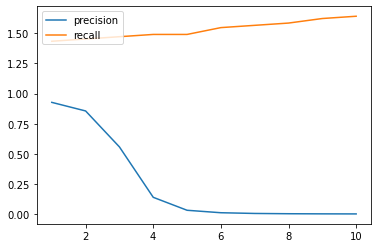

In [40]:
%matplotlib inline
import pylab

def accuracy(max_distance):
    similar = prod[prod.distance < max_distance]
    correct = float(sum(similar.cluster_x == similar.cluster_y))
    precision = correct / len(similar)
    recall = correct / len(clusters)
    return (precision, recall)

thresholds = range(1, 11)
p = []
r = []

for t in thresholds:
    acc = accuracy(t)
    p.append(acc[0])
    r.append(acc[1])

pylab.plot(thresholds, p)
pylab.plot(thresholds, r)
pylab.legend(['precision', 'recall'], loc='upper left')

> Q11) Another common way to visualize the tradeoff between precision and recall is to plot them directly against each other.
Create a scatterplot with precision on one axis and recall on the other.
Where are "good" points on the plot, and where are "bad" ones?


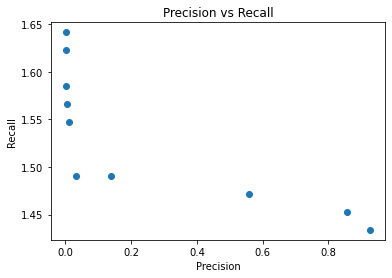

In [41]:
# Add your answer to Question 11 here

plt.scatter(p, r)

plt.xlabel('Precision')
plt.ylabel('Recall')
plt.title('Precision vs Recall')
plt.show()

The bad points in this plot are the ones that are very close to the boundary of x = 0. I'm not sure if we can classify the other points as good because I thought recall was measured between 0 and 1, which it is not from the provided code.